# Proteomics PCA

Notebook for performing PCA on the protein count files.

2020-11-16

## Initial boilerplate

In [11]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory paths
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = ''
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))

print('Standard variables loaded, you are good to go!')

Python-dotenv could not parse statement starting at line 1


Standard variables loaded, you are good to go!


## 1. Loading data

We load the outputs from featureCounts:

In [12]:
import pandas as pd

data_file_names = []
data_file_names.append("proteinCounts_on_Control1.tabular")
data_file_names.append("proteinCounts_on_Control4.tabular")
data_file_names.append("proteinCounts_on_Control5.tabular")
data_file_names.append("proteinCounts_on_KCl2.tabular")
data_file_names.append("proteinCounts_on_KCl3.tabular")
data_file_names.append("proteinCounts_on_KCl4.tabular")
data_file_names.append("proteinCounts_on_NaCl1.tabular")
data_file_names.append("proteinCounts_on_NaCl2.tabular")
data_file_names.append("proteinCounts_on_NaCl3.tabular")

protein_counts = pd.DataFrame()
for data_file_name in data_file_names:
    full_name = join(INTERMEDIATE,data_file_name)
    new_data = pd.read_csv(full_name, index_col=0, sep="\t")
    if protein_counts.empty:
        protein_counts = new_data
    else:
        protein_counts = pd.merge(protein_counts, new_data, left_index=True, right_index=True)
protein_counts

,Control1,Control4,Control5,KCl2,KCl3,KCl4,NaCl1,NaCl2,NaCl3
ProteinID,,,,,,,,,
A9RAG1,3.413939e+04,1.989405e+04,2.374892e+04,10257.12500,22008.81250,5921.660645,18731.65820,13975.84570,17955.03320
A9RAH5,8.905637e+04,0.000000e+00,9.103896e+04,61969.01563,115060.30470,44673.667970,115084.92970,108176.10940,98532.03125
B5RSM9,6.409729e+05,5.430246e+05,4.067811e+05,245296.93750,323050.93750,283788.187500,323429.06250,286589.09380,316030.50000
B5RSP1,1.875413e+04,2.950164e+04,2.493053e+04,14491.97559,32582.17969,7516.210938,25389.25781,18136.23242,19271.45117
B5RSP3,0.000000e+00,0.000000e+00,1.743827e+04,75336.92969,62537.53516,35365.816410,42202.92578,80577.25781,0.00000
...,...,...,...,...,...,...,...,...,...
W0TYT3,3.379782e+04,4.605775e+04,2.732377e+04,26127.00391,30902.94336,20457.132810,31262.00781,28475.68555,31251.72852
W0TYU0,7.810343e+04,1.174860e+05,8.115009e+04,55266.62500,67995.65625,58573.984380,72456.68750,62146.10938,69709.16406
W0TYU1,4.165645e+04,3.258390e+04,2.827518e+04,24913.87500,40868.91797,18871.992190,41715.14844,32748.48633,34580.36328


There are some rows that have 2 protein IDs. We will correct them:

In [14]:
# Convert dataframe to mass based:
for (row_name, row) in protein_counts.iterrows():
    if '_' in row_name:
        new_name = row_name.split('_')[0]
        protein_counts = protein_counts.rename(index={row_name: new_name})
        print(f"{row_name} -> {new_name}")


Q6BGP9_Q6BVH2 -> Q6BGP9
Q6BHV7_Q6BX12 -> Q6BHV7
Q6BKE0_Q6BRR6 -> Q6BKE0
Q6BKW7_Q6BRG2 -> Q6BKW7
Q6BR22_Q6BVR0 -> Q6BR22
Q6BWL7_Q6BWL8 -> Q6BWL7


## 2. PCA

We will implement a PCA function that can be called several times later:

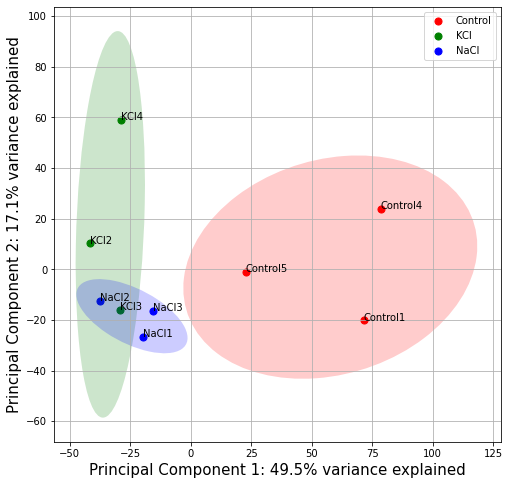

In [15]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# function for running and plotting a PCA:
def plot_PCA(feature_counts):

    # transpose data (variables should be the genes)
    feature_counts = feature_counts.transpose()

    # normalize the data:
    x = feature_counts.loc[:, ].values
    x = StandardScaler().fit_transform(x)

    # run PCA:
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)

    #transform PCA results to dataframe
    pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
    pca_df.index = feature_counts.index
    groups = ["Control", "KCl", "NaCl"]
    for (idx, row) in pca_df.iterrows():
        for group in groups:
            if group in idx:
                pca_df.loc[idx,"group"] = group

    # get % of variability from each component
    exp_var_1 = round(pca.explained_variance_ratio_[0]*100, 1)
    exp_var_2 = round(pca.explained_variance_ratio_[1]*100, 1)

    # plot results
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(f'Principal Component 1: {exp_var_1}% variance explained', fontsize = 15)
    ax.set_ylabel(f'Principal Component 2: {exp_var_2}% variance explained', fontsize = 15)
    colors = ["r","g","b"]  # RGB
    for group, color in zip(groups,colors):
        to_keep = pca_df['group'] == group
        x = pca_df.loc[to_keep, 'PC1']
        y = pca_df.loc[to_keep, 'PC2']
        ax.scatter(x, y, c=color, s=50)
        confidence_ellipse(x, y, ax, n_std=2, edgecolor="none", facecolor=color, alpha=0.2, label='_nolegend_')
    ax.legend(groups)
    for (idx, row) in pca_df.iterrows():
        ax.text(row["PC1"], row["PC2"], idx)
    ax.grid()

plot_PCA(protein_counts)